## Métodos de Otimização: Métodos Heuristicos

### Evolução Diferenciada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random

In [2]:
def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

In [4]:
Qtind = 25
Qvar = 2
F = 1 #[0,2]

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
pop_new =np.zeros((Qtind,Qvar) , dtype = 'float')
fpop =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
delta =np.zeros(2 , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')

xmin[:] = 0
xmax[:] = 6
delta[:] = 0.5

In [5]:
#criando a populacao inicial e suas funcoes objetivo
for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i] = f(pop[i,:])

minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]

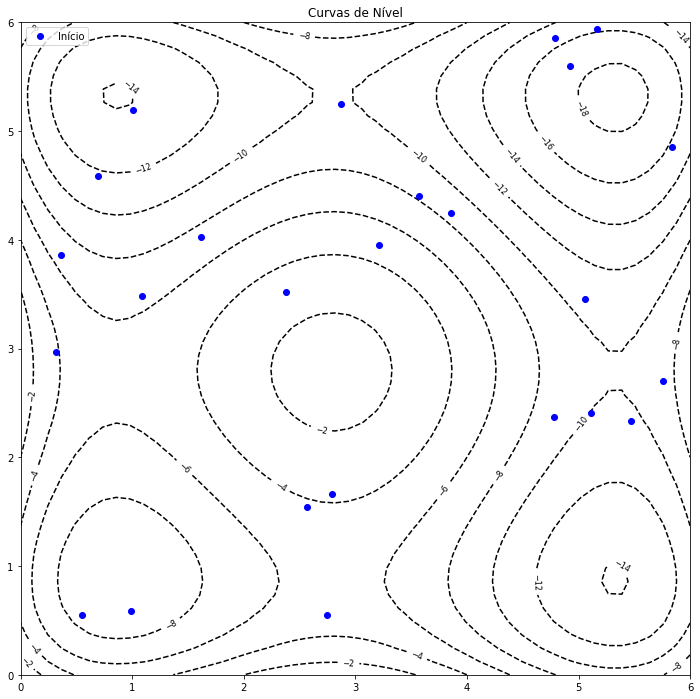

In [6]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(pop[:,0], pop[:,1], 'bo')
plt.legend(['Início', 'Fim'], loc='upper left')
plt.show()

In [7]:
niter_max=40
pop_new=pop.copy()
layout = "{0:.5f}"
niter=0
while niter<niter_max:
    for i in range(0,Qtind):
        alpha = random.randrange(Qtind)
        while (alpha==i) : alpha = random.randrange(Qtind)
        beta = random.randrange(Qtind)
        while (beta==i and beta==alpha): beta = random.randrange(Qtind)
        gamma = random.randrange(Qtind)
        while (gamma==i and gamma==alpha and gamma==beta): gamma = random.randrange(Qtind)
        #print("i:"+str(i)+" "+"Alpha"+str(alpha)+" "+"Beta"+str(beta)+" "+"Gamma"+str(gamma))
    
        pop_new[i,:] = delta[0]*pop[i,:]+delta[1]*(pop[alpha,:]+F*(pop[beta,:]-pop[gamma,:]))
        pop_new[i,:] = max(min(min(pop_new[i,:]),min(xmax[:])),max(xmin[:]))
        fsol = f(pop_new[i,:])
        
        if fsol < fpop[i] :
            fpop[i]=fsol
            pop[i,:]=pop_new[i,:]
                
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    
    niter += 1


4.92733 5.59734 -17.34932
5.04123 5.04123 -17.73518
5.08667 5.08667 -17.96480
5.19848 5.19848 -18.38307
5.19848 5.19848 -18.38307
5.19848 5.19848 -18.38307
5.41193 5.41193 -18.48978
5.29819 5.29819 -18.55671
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33019 5.33019 -18.56802
5.33014 5.33014 -18.56802
5.33014 5.33014 -18.56802
5.33014 5.33014 -18.56802
5.33014 5.33014 -18.56802
5.33000 5.33000 -18.56802
5.33007 5.33007 -18.56802
5.33007 5.33007 -18.56802
5.33007 5.33007 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33

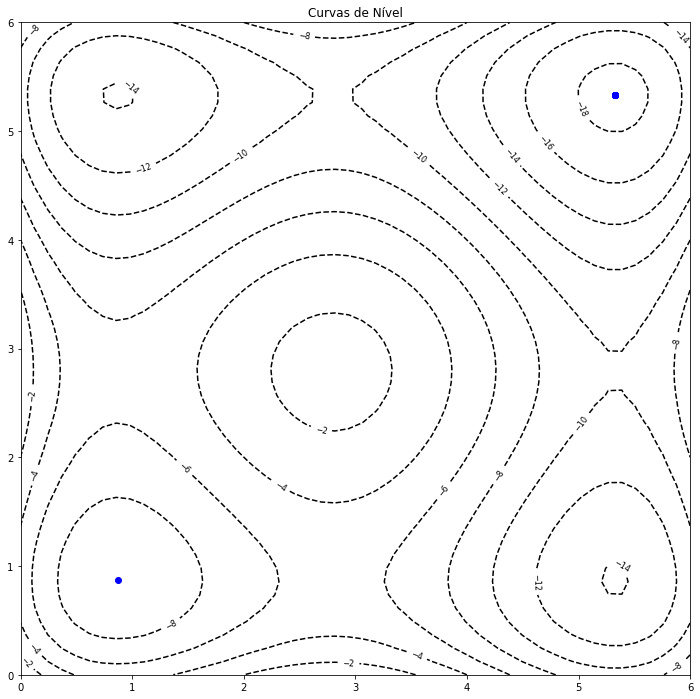

In [8]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

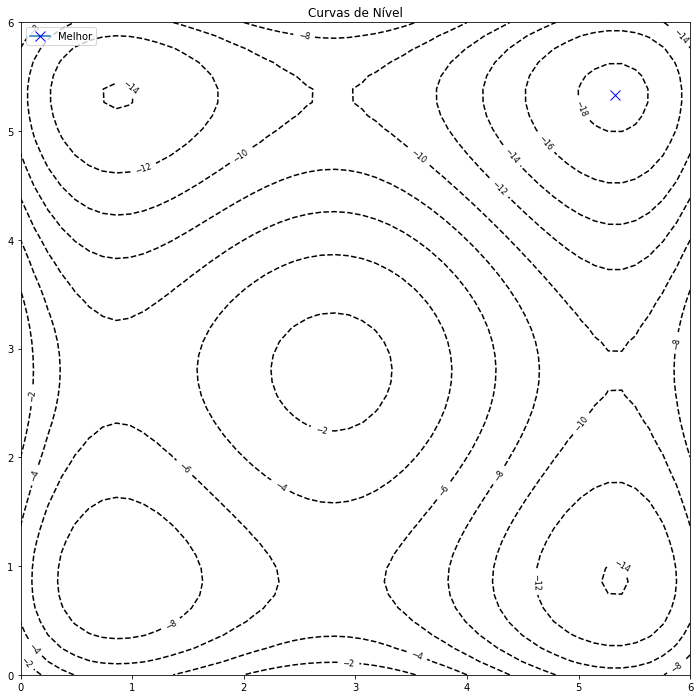

In [13]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(pbest[0], pbest[1], marker="x", markersize=10, markeredgecolor="b", markerfacecolor="b")
plt.legend(['Melhor'], loc='upper left')
plt.show()